# Tweepy for Twitter API

Twitter is a social networking service with approximately [330 million](https://www.statista.com/statistics/282087/number-of-monthly-active-twitter-users/) active users each month. This many users generates large sets of user data, tweets, and provides opportunity for effective third-party ads. [Twitter Developer]() has documentation categorized by project type. Twitter has a complicated authentication system that utilizes [OAuth](https://developer.twitter.com/en/docs/basics/authentication/overview/oauth). 

We will be using twitter wrapper in Python called [Tweepy]('http://docs.tweepy.org/en/v3.4.0/getting_started.html')that handles our access to the Twitter API with OAuth. For this tutorial we will be using the following modules:

In [7]:
import tweepy
import time
import numpy as np
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Get Twitter and API keys
If you already have a Twitter account, this will be a simple process. The first step is to make sure that your Twitter account is connected to your mobile device. To do this, log in, click on your profile > settings and privacy > mobile. This is important because when you proceed to make a developer application, the verification process will not go through unless your mobile phone has been verified and connected to your account. 

Next, visit the [Twitter Developer Page](https://apps.twitter.com/app/new) and create an application. The application name is the name of your app/ project. This has to be unique. For the website field, you can put your own website, a link to your github, or a link to your twitter profile. After the app registration, you should re-directed to your developer account with consumer key, permissions (access key changes based on this), and settings. On the keys and access token page, click on the token button at the bottom of the page. Make sure to copy the Access token and Access token secret for later use. 

## Step 2: OAuth Authentication

Twitter provides various API connections and streaming API is one of them. Tweepy can connect to the Streaming API and fetch us the necessary data. In order to connect to the API, the Tweepy library provides us with [authentication](http://docs.tweepy.org/en/v3.4.0/auth_tutorial.html) tools to connect with OAuth. We need to start first by creating an OAuthHandler instance. 

In [8]:
#note the system time at start
s_time = time.time()
timeout = 30
#variables that needs to be replaced with YOUR information
access_token = '59365929-HuhsCbSGEzGZOWbNhbfGuaQjI52AJkHiUNEiDImaE'
access_secret = 'vyYTrWsyIORFFHQodtutaHWZSNjvAH7KHCDZtYxzV55qn'
consumer_key = 'gAOTnLBBuv6Wvf2ZUkqgvXDq7'
consumer_secret = '9ZwMgmGFZpmddHcu3pQ4N25ylW1sMamXgIi93ZXD8gqgeLmUSH'

#establishing authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

Now that we have our keys and tokens stored and authorization established, we can start connecting with the Twitter Streaming API. The timeout value is basically how long you would like the streamlistener to keep collecting data. The longer you run this for, the the more data you will receive. However, remember Twitter has rate limits for all of its APIs. 

## Step 3: Streaming with Tweepy
Tweepy handles the authentication, connection, creating / closing sessions, reading and routing messages. The [Twitter Streaming API](https://developer.twitter.com/en/docs/tweets/filter-realtime/overview) us used for accessing large volumes of tweets. The streaming API pushes messages to a session and allows the download of more data then what we see with REST APIs. Rest APIs _pull_ data and an example of this is in the next tutorial with NY Times API. 

In Tweepy when [streaming sessions](http://docs.tweepy.org/en/v3.4.0/streaming_how_to.html) are established, it routes messages to a Listener event. 

## Step 4: Stream Creation


In [9]:
class StdStreamListener(tweepy.StreamListener):
    #creating a listener instance to ensure event times out
    def __init__(self, s_time, timeout):
        self.time = s_time
        self.limit = timeout
        self.saveData = open('twitter_data.json', 'a')
        
    # calling method to pass information to data    
    def on_data(self, data):
        if (time.time() - self.time) < self.limit:
            print(data)
            self.saveData.write(data)
            #appending data to a new line
            self.saveData.write('\n') 
            return True 
        else:
            self.saveData.close()
            return False
               
    def on_status(self, status_code):
        if status_code == 420:
            return False
        
    def on_error(self, status):
        if (time.time() -self.time) >= self.limit:
            print('timeout!')
            return False
        else:
            print(status)
            return True

Above we have created a class that is inheriting from the Tweepy's StreamListener. The on_data method gets all the messages and call functions based on the type of messages being received. 

In [10]:
stdStream = tweepy.Stream(auth=api.auth, listener=StdStreamListener(s_time, timeout))
stdStream.filter(track=['data', 'python'])

{"created_at":"Sun Jan 21 01:47:56 +0000 2018","id":954893291232755712,"id_str":"954893291232755712","text":"RT @Handoyo1998: @CH_chotimah @SBYudhoyono Mgkn sby lupa, tp data blm hilang.knp dulu riziek di penjara dan knp skrg riziek kabur. Jwb nya\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":838777607915130882,"id_str":"838777607915130882","name":"#DariDesaMembangunIndonesia","screen_name":"rgun12","location":null,"url":null,"description":"TPPI Kemendesa, P3MD\/TAPM-PSD Lampung (TIM Lampung Barat).\nSri Menanti, Way Kanan\ud83d\udc49 Lampung\ud83d\udc49 Indonesia (Lahir Batin)\nCyrilongcity thebest\ud83d\ude4f\ud83d\ude4f\ud83d\ude4f","translator_type":"none","protected":false,"verified":false,"followers_count":3267,"frie

{"created_at":"Sun Jan 21 01:47:58 +0000 2018","id":954893299197788161,"id_str":"954893299197788161","text":"RT @zerohedge: NSA \"Sincerely Regrets\" Deleting All Bush-Era Surveillance Data It Was Ordered To Preserve https:\/\/t.co\/Y0WGdZZRc8","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":313385516,"id_str":"313385516","name":"Navroop Singh","screen_name":"s_navroop","location":"New Delhi, India","url":"http:\/\/www.asianwarrior.com\/","description":"Trio-Asian Warrior. IPR Lawyer. Foreign Policy Analyst. Followed by PM @narendramodi. Co-Author of the book #TheNewGlobalOrder RT\u2260Endorsement","translator_type":"none","protected":false,"verified":false,"followers_count":18338,"friends_count":3108,"listed_count":505,"favourites

{"created_at":"Sun Jan 21 01:48:03 +0000 2018","id":954893322023137280,"id_str":"954893322023137280","text":"$NVTA \"In a very short period of time, say 12-18 months, if genetics is the question, Invitae will be the answer.\"\u2026 https:\/\/t.co\/4y2mg3miVm","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":71981852,"id_str":"71981852","name":"Dr Brett L Scarlett","screen_name":"blscarlett","location":"Melbourne, Australia","url":"http:\/\/code3indigo.com","description":"Strategic Advisor, Commercial Manager, Business Consultant & SME Director","translator_type":"none","protected":false,"verified":false,"followers_count":1089,"friends_count":2648,"listed_count":36,"favourites_count":693,"statuses_count":1

{"created_at":"Sun Jan 21 01:48:05 +0000 2018","id":954893331598794752,"id_str":"954893331598794752","text":"RT @CambridgeMDUSD: We are proud of you! Go WARRIORS!! https:\/\/t.co\/XTX3A1hkE9","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":260838092,"id_str":"260838092","name":"Ygnacio Valley High","screen_name":"YgnacioValley","location":"Concord, CA","url":"http:\/\/yvhs.mdusd.org","description":"Find out about all upcoming events and activities at Ygnacio Valley High! See link for our official website:","translator_type":"none","protected":false,"verified":false,"followers_count":841,"friends_count":154,"listed_count":14,"favourites_count":3553,"statuses_count":4258,"created_at":"Fri Mar 04 18:20:54 +0000 2011","utc_offset":-28800

{"created_at":"Sun Jan 21 01:48:07 +0000 2018","id":954893339525922818,"id_str":"954893339525922818","text":"Opinion: Search Engines Not Responsible for Deleting Personal Data From Index | Search Engine Watch - Part 2048417 https:\/\/t.co\/IMKsdMJdHS","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eMobile Web (M2)\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":892756676784398337,"id_str":"892756676784398337","name":"CyberStone","screen_name":"CyberZoneStone","location":"Crestview Hills, KY","url":null,"description":"I lowkey wish we were stuck in the Matrix. Sci-fi Nerd and Computer Whiz.","translator_type":"none","protected":false,"verified":false,"followers_count":1598,"friends_count":1390,"listed_count":14,"favourites_count":0,"statuses_count":36187,"created_at":"Wed Aug 02 14:39:13 +0000 2017","utc_offse

{"created_at":"Sun Jan 21 01:48:09 +0000 2018","id":954893345309982720,"id_str":"954893345309982720","text":"RT @Thomas_Drake1: BREAKING: NSA conveniently wipes out \u201801-\u201807 mass surveillance data from warrantless &amp; unconstitutional STELLAR WIND pro\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Lite\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3882048676,"id_str":"3882048676","name":"Quantum Animist","screen_name":"quantumanimist","location":"In the Light & Embrace of Love","url":null,"description":"Ancient Cultures said that Spirit \/ God \/ Consciousness is in Everything.  We're One Connected Universe. Quantum Physics is confirming it. NonDuality","translator_type":"none","protected":false,"verified":false,"followers_count":1028,"friends_count":1512,"listed_count":57,"favour

{"created_at":"Sun Jan 21 01:48:09 +0000 2018","id":954893347977682944,"id_str":"954893347977682944","text":"RT @hdevine92: #Day13: Added a home page to the app. Learned how to configure simple urls with urlpatterns, and create a view from an #html\u2026","source":"\u003ca href=\"http:\/\/aaroncuddeback.com\" rel=\"nofollow\"\u003eaarons-twitter-bot\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":310897418,"id_str":"310897418","name":"Aaron Cuddeback","screen_name":"AaronCuddeback","location":"Sacramento, CA","url":"http:\/\/aaroncuddeback.com","description":"Father, Entrepreneur, CEO, Newbie Programmer, Dreamer, Fearless","translator_type":"none","protected":false,"verified":false,"followers_count":1400,"friends_count":91,"listed_count":85,"favourites_count":38821,"statuses_count":41603,"created_at":"Sat Jun 04 14:57:55 +0000 2011","utc_

{"created_at":"Sun Jan 21 01:48:10 +0000 2018","id":954893351647670272,"id_str":"954893351647670272","text":"RT @nowthisnews: The FCC is not being transparent at all with its data https:\/\/t.co\/pKMaDy3dOF","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":822811143207088128,"id_str":"822811143207088128","name":"Ro","screen_name":"RobAnybody2","location":"Discworld","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":1724,"friends_count":2862,"listed_count":8,"favourites_count":79376,"statuses_count":27750,"created_at":"Sat Jan 21 14:20:38 +0000 2017","utc_offset":-28800,"time_zone":"Pacific Time (US & Canada)","geo_enabled":false,"lang":"en","contributors_enabled":false,"is_translator":false,"pro

{"created_at":"Sun Jan 21 01:48:12 +0000 2018","id":954893357708267520,"id_str":"954893357708267520","text":"RT @positive20147: \ubbf8\uce5c \ubb38\uc7ac\uc778 \uc815\uad8c..\uc2a4\ud3ec\uce20\ub97c \uc815\uce58\uc774\ub150\uc73c\ub85c \ubb3c\ub4e4\uc774\uace0 \uc788\ub2e4. \ud55c\ub9c8\ub514\ub85c \ud3c9\ucc3d \uc62c\ub9bc\ud53d\uc744 \uac78\ub808\ub9cc\ub4ec\n\n\ud3c9\ucc3d\uc62c\ub9bc\ud53d \uac1c\ub9c9 20\uc77c\uc744 \uc55e\ub450\uace0 \uc885\ubaa9\ubcc4\ub85c \uc608\uc0c1\uce58 \ubabb\ud588\ub358 \ub0a8\ubd81 \ud569\ub3d9 \ud6c8\ub828 \ubc0f \ud300 \uad6c\uc131 \uc774\uc57c\uae30\uac00 \ub098\uc624\uace0 \uc788\ub2e4. \ub9c9\ud310 \ud6c8\ub828\uc5d0 \uc9d1\uc911\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":93503410,"id

{"created_at":"Sun Jan 21 01:48:13 +0000 2018","id":954893361474953217,"id_str":"954893361474953217","text":"@Selebogo_T @G_Daffy Go to their website. Come on now you have data to tweet so you can google the SAMA Criteria do\u2026 https:\/\/t.co\/VqVra4L8un","display_text_range":[21,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":954892550984355840,"in_reply_to_status_id_str":"954892550984355840","in_reply_to_user_id":3250624623,"in_reply_to_user_id_str":"3250624623","in_reply_to_screen_name":"Selebogo_T","user":{"id":28643181,"id_str":"28643181","name":"Father Figure #YOG","screen_name":"lavidaNOTA","location":"\u00dcT: -26.21185,28.035343","url":"https:\/\/www.twitter.com\/lavidanota","description":"Nobody got Platinum Plaques where I grew up... Executive | Producer of 4 platinum singles & 6X SAMA winning double-platinum double album DaKAR II!","translator_type":"n

{"created_at":"Sun Jan 21 01:48:14 +0000 2018","id":954893368907120641,"id_str":"954893368907120641","text":"\u7af6\u8247 \u5c55\u958b\u4e88\u60f3\u653b\u7565\u306e\u30c0\u30a6\u30f3\u30ed\u30fc\u30c9.CD\u8ca9\u58f2 https:\/\/t.co\/SnDJg5Jf9d #shouheichan @shouheichan alive\u3055\u3093\u304b\u3089 \u5168\u56fd24\u7af6\u8247\u5834 SG.G1\u5c02\u7528DATA\u767a\u58f2\u4e2d\u3002\u662f\u975e\u3054\u691c\u8a0e\u304f\u3060\u3055\u3044\u3002","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2984044178,"id_str":"2984044178","name":"\u6b63\u5e73\u3061\u3083\u3093**\u5922\u5922\u30fb\u798f\u798f**","screen_name":"fukuwoyobu55","location":null,"url":"http:\/\/www2.hp-ez.com\/hp\/fukuwoyobu55","description":null,"translator_type":"none","protected":false,"verified"

{"created_at":"Sun Jan 21 01:48:15 +0000 2018","id":954893372929458176,"id_str":"954893372929458176","text":"@cahr_man @JohnConnorSN @AiG This is why I am stressing appropriate samples, appropriate methods, and appropriate c\u2026 https:\/\/t.co\/apYwODFIGH","display_text_range":[29,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":954871081923497984,"in_reply_to_status_id_str":"954871081923497984","in_reply_to_user_id":564108616,"in_reply_to_user_id_str":"564108616","in_reply_to_screen_name":"cahr_man","user":{"id":796591812731424768,"id_str":"796591812731424768","name":"Jeff","screen_name":"jeff47365724","location":"California, USA","url":null,"description":"Dad, husband, scientist","translator_type":"none","protected":false,"verified":false,"followers_count":11,"friends_count":49,"listed_count":1,"favourites_count":293,"statuses_count":669,"created_at":"Thu Nov 10 0

{"created_at":"Sun Jan 21 01:48:19 +0000 2018","id":954893387907457025,"id_str":"954893387907457025","text":"Currently on top of the world without cellular data. @ Gothenburg https:\/\/t.co\/edWEcs773Y","source":"\u003ca href=\"http:\/\/instagram.com\" rel=\"nofollow\"\u003eInstagram\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":192069918,"id_str":"192069918","name":"Melanie Jenner","screen_name":"Melanie_Sniper","location":"Kenosha, USA","url":"http:\/\/www.instagram.com\/melanie_jenner","description":"I\u2019m just trying to get my smoothie on, dawg.","translator_type":"none","protected":false,"verified":false,"followers_count":122,"friends_count":274,"listed_count":6,"favourites_count":708,"statuses_count":3725,"created_at":"Sat Sep 18 03:01:48 +0000 2010","utc_offset":-21600,"time_zone":"Central Time (US & Canada)","geo_enabled":tru

After we have saved our streamed tweets into a josn file, we can proceed on to the next step. This step focusing on parsing through the json file, reading, and making sense of the data we have gathered. We have filtered our stream by the words data and python. Feel free to add more words and change the timeout value to generate your custom json file. 

## Step 5: Understanding the Data

In [14]:
#fetch the saved json file
cur_path = os.getcwd()

_file_path = os.path.join(cur_path, 'twitter_data.json')

def data_manipulation():
        
    tweets_ls = []
    tweets_file = open(_file_path, 'r') #opened file in read mode

    #we appended each tweet line by line
    for l in tweets_file:
        try:
            tweet = json.loads(l)
            tweets_ls.append(tweet)
        except Exception:
            pass
        
    return tweets_ls

x = data_manipulation()
print(len(x))

163


Printing the length helped us confirm that something was returned. Now, we can put the list into a panda's data frame for further manipulation. 

## Step 6: Creating a DataFrame

In [15]:
def data_structure(tweets_ls):
    
    text, lang = [], [] 
    
    c = 0
    for item in tweets_ls[c]:
        text.append(tweets_ls[c]['text'])
        lang.append(tweets_ls[c]['lang'])
        
        c += 1

    df = pd.DataFrame({'text':text, 'lang':lang})
    return df

print(data_structure(x))



   lang                                               text
0    en  RT @HPODavidHanna: What Can a Chief Data Offic...
1    es  RT @cayeruby: Rajoy aparece treinta y tres vec...
2    en  RT @mamaknock1: #NSA deleted surveillance data...
3    en  Law enforcement \nTop 50 Running restaurant fr...
4    fa  RT @SaeedEsmaili: اولین مطلب وبلاگم رو بخونید:...
5    en  Get to know GEICO for great careers, too. #hir...
6    en  RT @IdeaGov: #TrumpRussia inquiry is told Nige...
7    en  RT @john_danfulani: Face your business.Are you...
8    in  @iidnaim Mohon maaf Bpk Idnaim untuk pengeceka...
9    en  RT @kylegriffin1: Trump’s effort to put coal m...
10   en  RT @apjama: When Londoners say that Croydon is...
11   en  i wanna watch rolivia videos but my data is sh...
12   en  Retweeted John Danfulani (@john_danfulani):\n\...
13   en  Retweeted John Danfulani (@john_danfulani):\n\...
14   en       @GregHeav5 @WxBDM Unless you got python bro.
15   pt  @segurancasocial importam se de não ter o site.

## Step 7: Performing a Visualization 

We have data on the language that was used for the texts. Let's take this data and visualize the top 5 languages used!

en    24
in     1
fr     1
es     1
pt     1
fa     1
Name: lang, dtype: int64


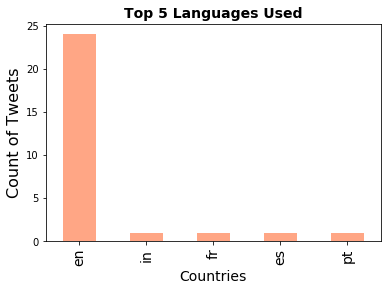

In [16]:
#n = main_df.groupby('lang').nunique()
freq = data_structure(x)['lang'].value_counts()
print(freq)

%matplotlib inline
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=14)
ax.set_ylabel('Count of Tweets' , fontsize=16)
ax.set_title('Top 5 Languages Used', fontsize=14, fontweight='bold')
freq[:5].plot(ax=ax, kind='bar', color='#ffa685')
plt.show()